# **Problem Statement**

In the realm of modern finance, businesses encounter the perpetual challenge of managing debt obligations effectively to maintain a favorable credit standing and foster sustainable growth. Investors keenly scrutinize companies capable of navigating financial complexities while ensuring stability and profitability. A pivotal instrument in this evaluation process is the balance sheet, which provides a comprehensive overview of a company's assets, liabilities, and shareholder equity, offering insights into its financial health and operational efficiency. In this context, leveraging available financial data, particularly from preceding fiscal periods, becomes imperative for informed decision-making and strategic planning.

# **Objective**

A group of venture capitalists want to develop a Financial Health Assessment Tool. With the help of the tool, it endeavors to empower businesses and investors with a robust mechanism for evaluating the financial well-being and creditworthiness of companies. By harnessing machine learning techniques, they aim to analyze historical financial statements and extract pertinent insights to facilitate informed decision-making via the tool. Specifically, they foresee facilitating the following with the help of the tool:

1. Debt Management Analysis: Identify patterns and trends in debt management practices to assess the ability of businesses to fulfill financial obligations promptly and efficiently, and identify potential cases of default.

2. Credit Risk Evaluation: Evaluate credit risk exposure by analyzing liquidity ratios, debt-to-equity ratios, and other key financial indicators to ascertain the likelihood of default and inform investment decisions.


They have hired you as a data scientist and provided you with the financial metrics of different companies. The task is to analyze the data provided and develop a predictive model leveraging machine learning techniques to identify whether a given company will be tagged as a defaulter in terms of net worth next year. The predictive model will help the organization anticipate potential challenges with the financial performance of the companies and enable proactive risk mitigation strategies.



# **Data Dictionary**

Networth Next Year: Net worth of the customer in the next year

Total assets: Total assets of customer

Net worth: Net worth of the customer of the present year

Total income: Total income of the customer

Change in stock: Difference between the current value of the stock and the

value of stock in the last trading day

Total expenses: Total expenses done by the customer

Profit after tax: Profit after tax deduction

PBDITA: Profit before depreciation, income tax, and amortization

PBT: Profit before tax deduction

Cash profit: Total Cash profit

PBDITA as % of total income: PBDITA / Total income

PBT as % of total income: PBT / Total income

PAT as % of total income: PAT / Total income

Cash profit as % of total income: Cash Profit / Total income

PAT as % of net worth: PAT / Net worth

Sales: Sales done by the customer

Income from financial services: Income from financial services

Other income: Income from other sources

Total capital: Total capital of the customer

Reserves and funds: Total reserves and funds of the customer

Borrowings: Total amount borrowed by the customer

Current liabilities & provisions: current liabilities of the customer

Deferred tax liability: Future income tax customer will pay because of the
current transaction

Shareholders funds: Amount of equity in a company which belongs to shareholders

Cumulative retained profits: Total cumulative profit retained by customer

Capital employed: Current asset minus current liabilities

TOL/TNW: Total liabilities of the customer divided by Total net worth

Total term liabilities / tangible net worth: Short + long term liabilities divided by tangible net worth

Contingent liabilities / Net worth (%): Contingent liabilities / Net worth

Contingent liabilities: Liabilities because of uncertain events

Net fixed assets: The purchase price of all fixed assets

Investments: Total invested amount

Current assets: Assets that are expected to be converted to cash within a year

Net working capital: Difference between the current liabilities and current assets

Quick ratio (times): Total cash divided by current liabilities

Current ratio (times): Current assets divided by current liabilities

Debt to equity ratio (times): Total liabilities divided by its shareholder equity

Cash to current liabilities (times): Total liquid cash divided by current liabilities

Cash to average cost of sales per day: Total cash divided by the average cost of the sales

Creditors turnover: Net credit purchase divided by average trade creditors

Debtors turnover: Net credit sales divided by average accounts receivable

Finished goods turnover: Annual sales divided by average inventory

WIP turnover: The cost of goods sold for a period divided by the average
inventory for that period

Raw material turnover: Cost of goods sold is divided by the average inventory for the same period

Shares outstanding: Number of issued shares minus the number of shares held in the company

Equity face value: cost of the equity at the time of issuing

EPS: Net income divided by the total number of outstanding share

Adjusted EPS: Adjusted net earnings divided by the weighted average number of common shares outstanding on a diluted basis during the plan year

Total liabilities: Sum of all types of liabilities

PE on BSE: Company's current stock price divided by its earnings per share

#**Criteria**


**PART A: Define the problem and perform Exploratory Data Analysis**

- Problem definition - Check shape, Data types, and statistical summary - Univariate analysis - Multivariate analysis - Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables

**PART A: Data Pre-processing**

- Prepare the data for modeling: - Outlier Detection (treat, if needed) - Encode the data - Data split - Scale the data - Target variable creation * The target variable is default and should take the value 1 when net worth next year is negative & 0 when net worth next year is positive

**PART A: Model Building**

- Metrics of Choice (Justify the evaluation metrics) - Model Building (Logistic Regression, Random Forest) - Model performance check across different metrics


**PART A: Model Performance Improvement**

- Dealing with multicollinearity using VIF - Identify optimal threshold for Logistic Regression using ROC curve - Hyperparameter Tuning for Random Forest - Model performance check across different metrics

**PART A: Model Performance Comparison and Final Model Selection**

- Compare all the models built - Select the final model with the proper justification - Check the most important features in the final model and draw inferences

**PART A: Actionable Insights & Recommendations**

- Actionable insights and recommendations


# **Importing Library**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np # Import numpy library and alias it as np

data = pd.read_csv('/content/CompanyFRA.csv')

In [2]:
data.head()


,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


In [3]:
data.tail()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
4251,4252,0.2,0.4,0.2,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.4,NaN
4252,4253,93.3,159.6,86.7,172.9,0.1,169.7,3.3,18.4,3.7,...,1.80,11.00,8.28,9.88,8162700.0,10.0,0.42,0.42,159.6,16.81
4253,4254,932.2,833.8,664.6,2314.7,32.1,2151.6,195.2,348.4,303.0,...,6.08,59.28,31.14,9.87,7479762.0,10.0,26.58,26.58,833.8,5.69
4254,4255,64.6,95.0,48.5,110.5,4.6,113.5,1.6,9.7,2.6,...,3.71,78.99,11.51,14.95,NaN,NaN,0.00,0.00,95.0,NaN
4255,4256,0.0,384.6,111.3,345.8,11.3,341.7,15.4,57.6,20.7,...,4.71,53.37,8.33,3.74,960000.0,10.0,15.63,15.63,384.6,NaN


In [4]:
data.shape

(4256, 51)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          4256 non-null   int64  
 1   Networth Next Year                           4256 non-null   float64
 2   Total assets                                 4256 non-null   float64
 3   Net worth                                    4256 non-null   float64
 4   Total income                                 4025 non-null   float64
 5   Change in stock                              3706 non-null   float64
 6   Total expenses                               4091 non-null   float64
 7   Profit after tax                             4102 non-null   float64
 8   PBDITA                                       4102 non-null   float64
 9   PBT                                          4102 non-null   float64
 10  

In [6]:
data.describe()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
count,4256.000000,4256.000000,4.256000e+03,4256.000000,4.025000e+03,3706.000000,4.091000e+03,4102.000000,4102.000000,4102.000000,...,3871.000000,3382.000000,3492.000000,3828.000000,3.446000e+03,3446.000000,4256.000000,4256.000000,4.256000e+03,1629.000000
mean,2128.500000,1344.740883,3.573617e+03,1351.949601,4.688190e+03,43.702482,4.356301e+03,295.050585,605.940639,410.259044,...,17.929029,84.369988,28.684513,17.733926,2.376491e+07,-1094.828671,-196.217467,-197.527608,3.573617e+03,55.462290
std,1228.745702,15936.743168,3.007444e+04,12961.311651,5.391895e+04,436.915048,5.139809e+04,3079.902071,5646.230633,4217.415307,...,90.164435,562.637359,169.650915,343.125864,1.709790e+08,34101.358644,13061.953425,13061.929512,3.007444e+04,1304.445296
min,1.000000,-74265.600000,1.000000e-01,0.000000,0.000000e+00,-3029.400000,-1.000000e-01,-3908.300000,-440.700000,-3894.800000,...,0.000000,-0.090000,-0.180000,-2.000000,-2.147484e+09,-999998.900000,-843181.820000,-843181.820000,1.000000e-01,-1116.640000
25%,1064.750000,3.975000,9.130000e+01,31.475000,1.071000e+02,-1.800000,9.680000e+01,0.500000,6.925000,0.800000,...,3.810000,8.190000,5.100000,3.020000,1.308382e+06,10.000000,0.000000,0.000000,9.130000e+01,2.970000
50%,2128.500000,72.100000,3.155000e+02,104.800000,4.551000e+02,1.600000,4.268000e+02,9.000000,36.900000,12.600000,...,6.470000,17.320000,9.860000,6.410000,4.750000e+06,10.000000,1.490000,1.240000,3.155000e+02,8.690000
75%,3192.250000,330.825000,1.120800e+03,389.850000,1.485000e+03,18.400000,1.395700e+03,53.300000,158.700000,74.175000,...,11.850000,40.012500,20.240000,11.822500,1.090602e+07,10.000000,10.000000,7.615000,1.120800e+03,17.000000
max,4256.000000,805773.400000,1.176509e+06,613151.600000,2.442828e+06,14185.500000,2.366035e+06,119439.100000,208576.500000,145292.600000,...,3135.200000,17947.600000,5651.400000,21092.000000,4.130401e+09,100000.000000,34522.530000,34522.530000,1.176509e+06,51002.740000


# **Sanity Checks**

In [7]:
data.isnull().sum()

,0
Num,0
Networth Next Year,0
Total assets,0
Net worth,0
Total income,231
Change in stock,550
Total expenses,165
Profit after tax,154
PBDITA,154
PBT,154


In [8]:
data = pd.DataFrame(data)
duplicates = data[data.duplicated()]
if not duplicates.empty:
    print("Duplicates found!")
else:
    print("No duplicates found.")

No duplicates found.


In [9]:
# Impute Numeric Columns

# Let's separate numeric and categorical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

# Check if 'Defaulter' (or a similar column) exists and is numeric before removing
# If the column name is different, replace 'Defaulter' with the actual column name

target_column = 'Networth Next Year'  # Replace with the actual target column name if different

if target_column in num_cols:
    num_cols.remove(target_column)  # Don't impute target

# Impute numeric columns with median
data[num_cols] = data[num_cols].apply(lambda x: x.fillna(x.median())) # Changed df to data

In [10]:
data.isnull().sum()

,0
Num,0
Networth Next Year,0
Total assets,0
Net worth,0
Total income,0
Change in stock,0
Total expenses,0
Profit after tax,0
PBDITA,0
PBT,0


1. Imputed missing values in numerical columns using median.
2. Verified no remaining nulls before modeling.

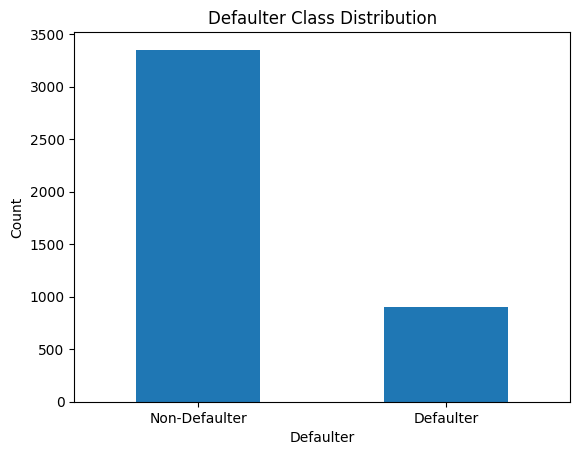

In [11]:
# Create 'Defaulter' column: 1 if Networth Next Year <= 0 else 0

data['Defaulter'] = data['Networth Next Year'].apply(lambda x: 1 if x <= 0 else 0)

# Check distribution of target
data['Defaulter'].value_counts().plot(kind='bar', title='Defaulter Class Distribution')
plt.xticks([0, 1], ['Non-Defaulter', 'Defaulter'], rotation=0)
plt.ylabel("Count")
plt.show()

# **Univariate Analysis**

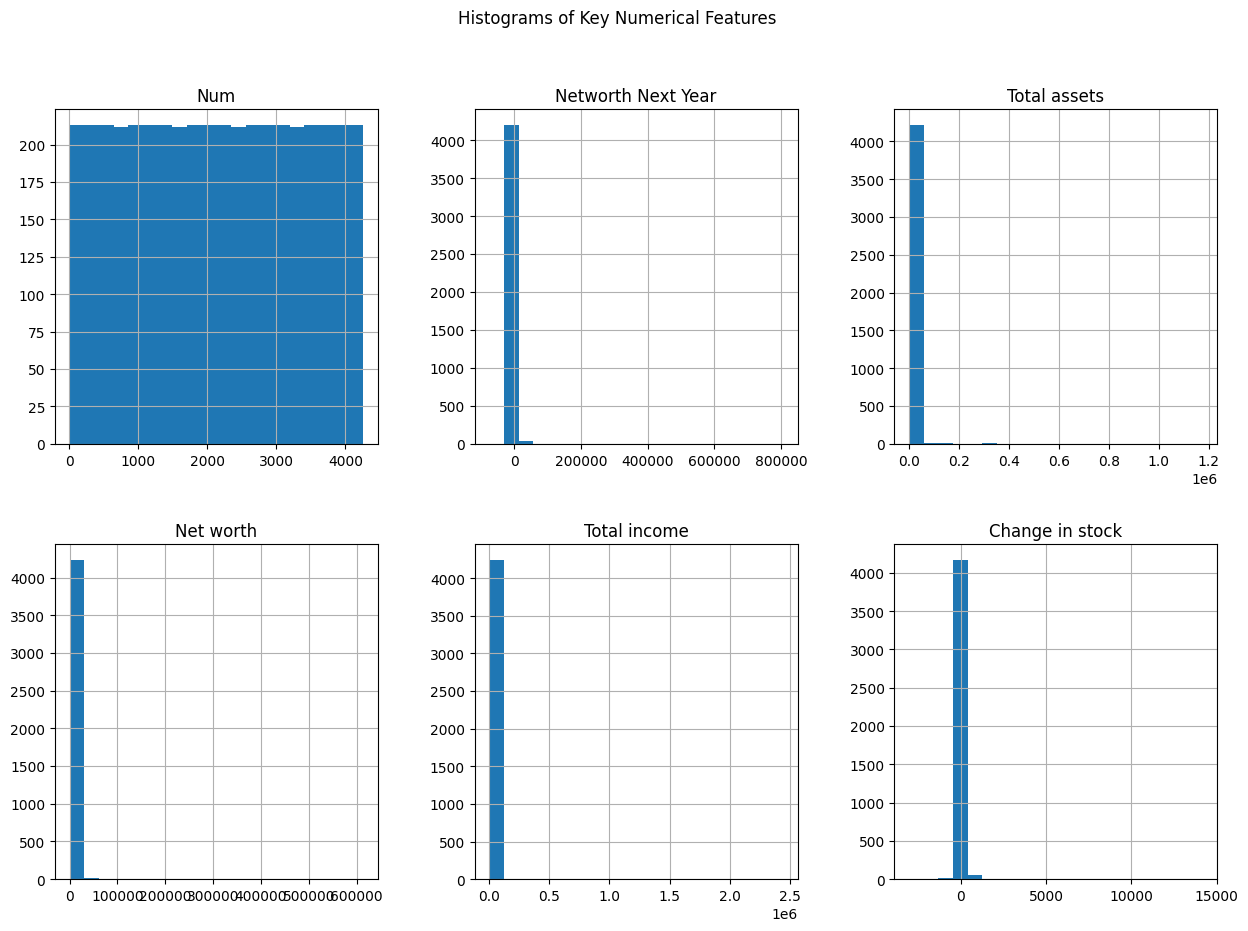

In [12]:
# Numerical Features

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('Defaulter')  # Exclude target

# Histograms for selected features
data[numerical_cols[:6]].hist(bins=20, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Histograms of Key Numerical Features')
plt.show()


In [13]:
data[numerical_cols].skew().sort_values(ascending=False)


,0
Raw material turnover,63.903692
PE on BSE,60.125353
Income from fincial services,47.026006
Contingent liabilities,46.067503
Other income,44.687670
Cash to average cost of sales per day,39.304896
Net fixed assets,38.214935
Networth Next Year,36.375204
Reserves and funds,34.504894
Current ratio (times),33.700107


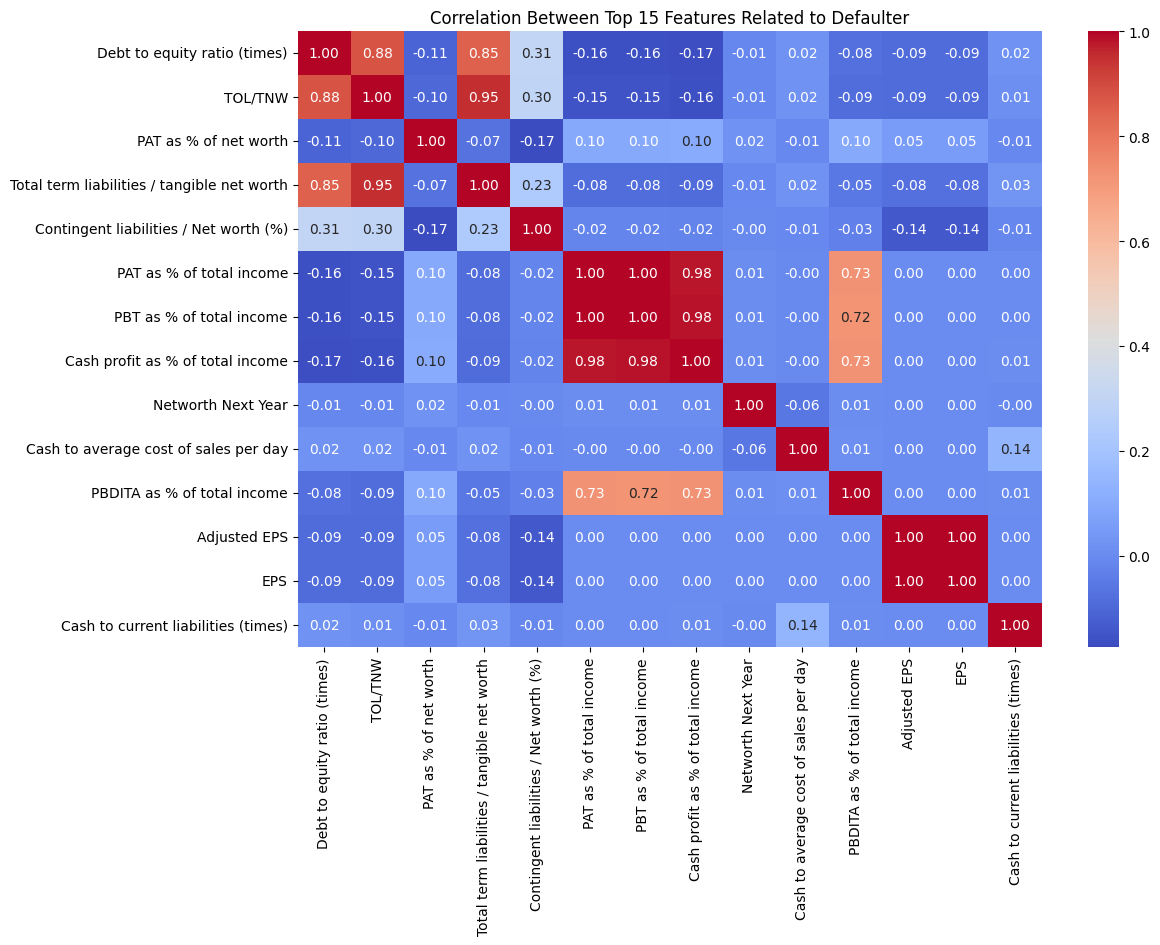

In [14]:
# Compute correlation matrix
corr_matrix = data.corr()

# Correlation with the target
top_corr_features = corr_matrix['Defaulter'].abs().sort_values(ascending=False)[1:15].index

# Heatmap of top correlated features
plt.figure(figsize=(12, 8))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Top 15 Features Related to Defaulter")
plt.show()

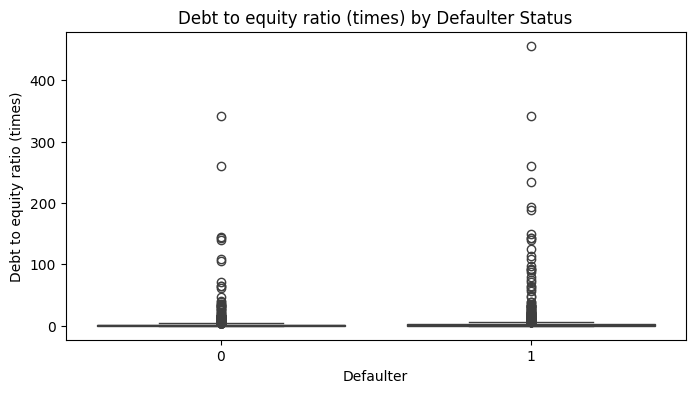

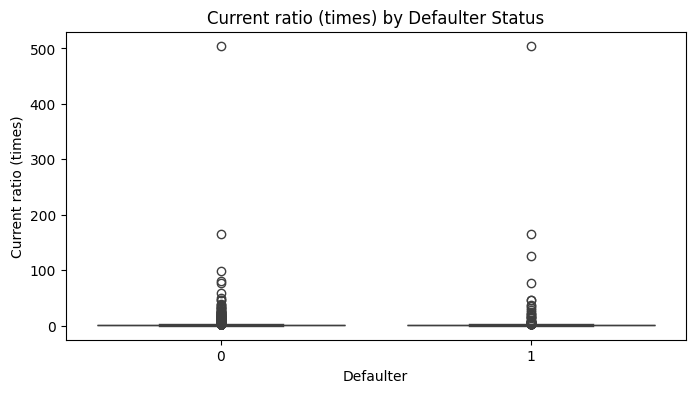

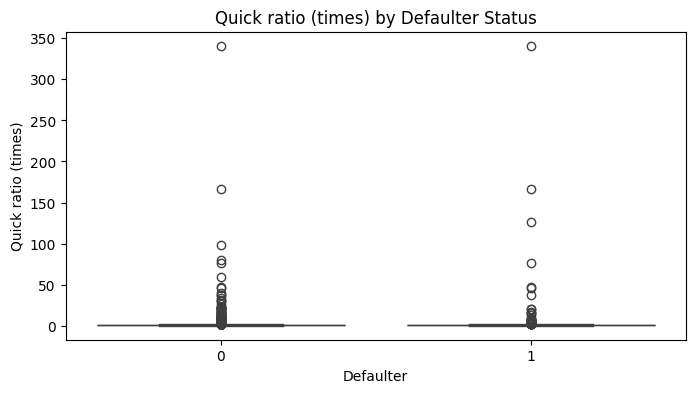

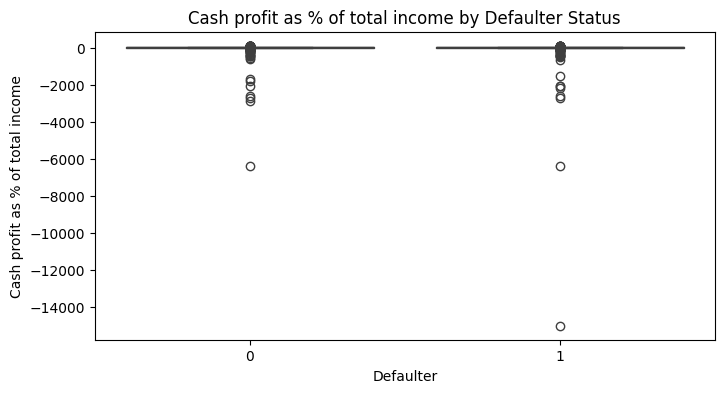

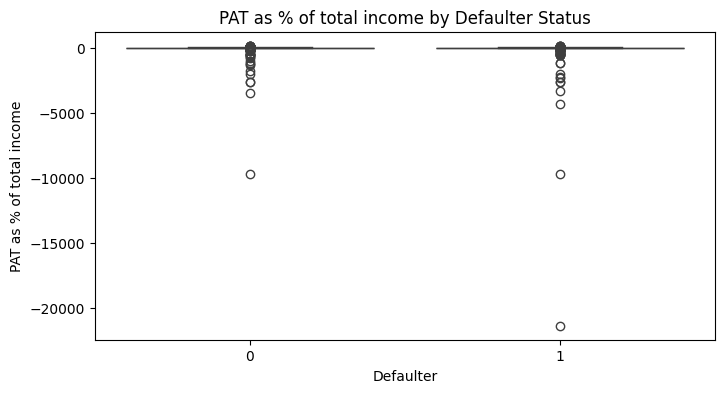

In [15]:
important_ratios = [
    'Debt to equity ratio (times)',
    'Current ratio (times)',
    'Quick ratio (times)',
    'Cash profit as % of total income',
    'PAT as % of total income',
]

for col in important_ratios:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x='Defaulter', y=col)
    plt.title(f'{col} by Defaulter Status')
    plt.xlabel("Defaulter")
    plt.ylabel(col)
    plt.show()


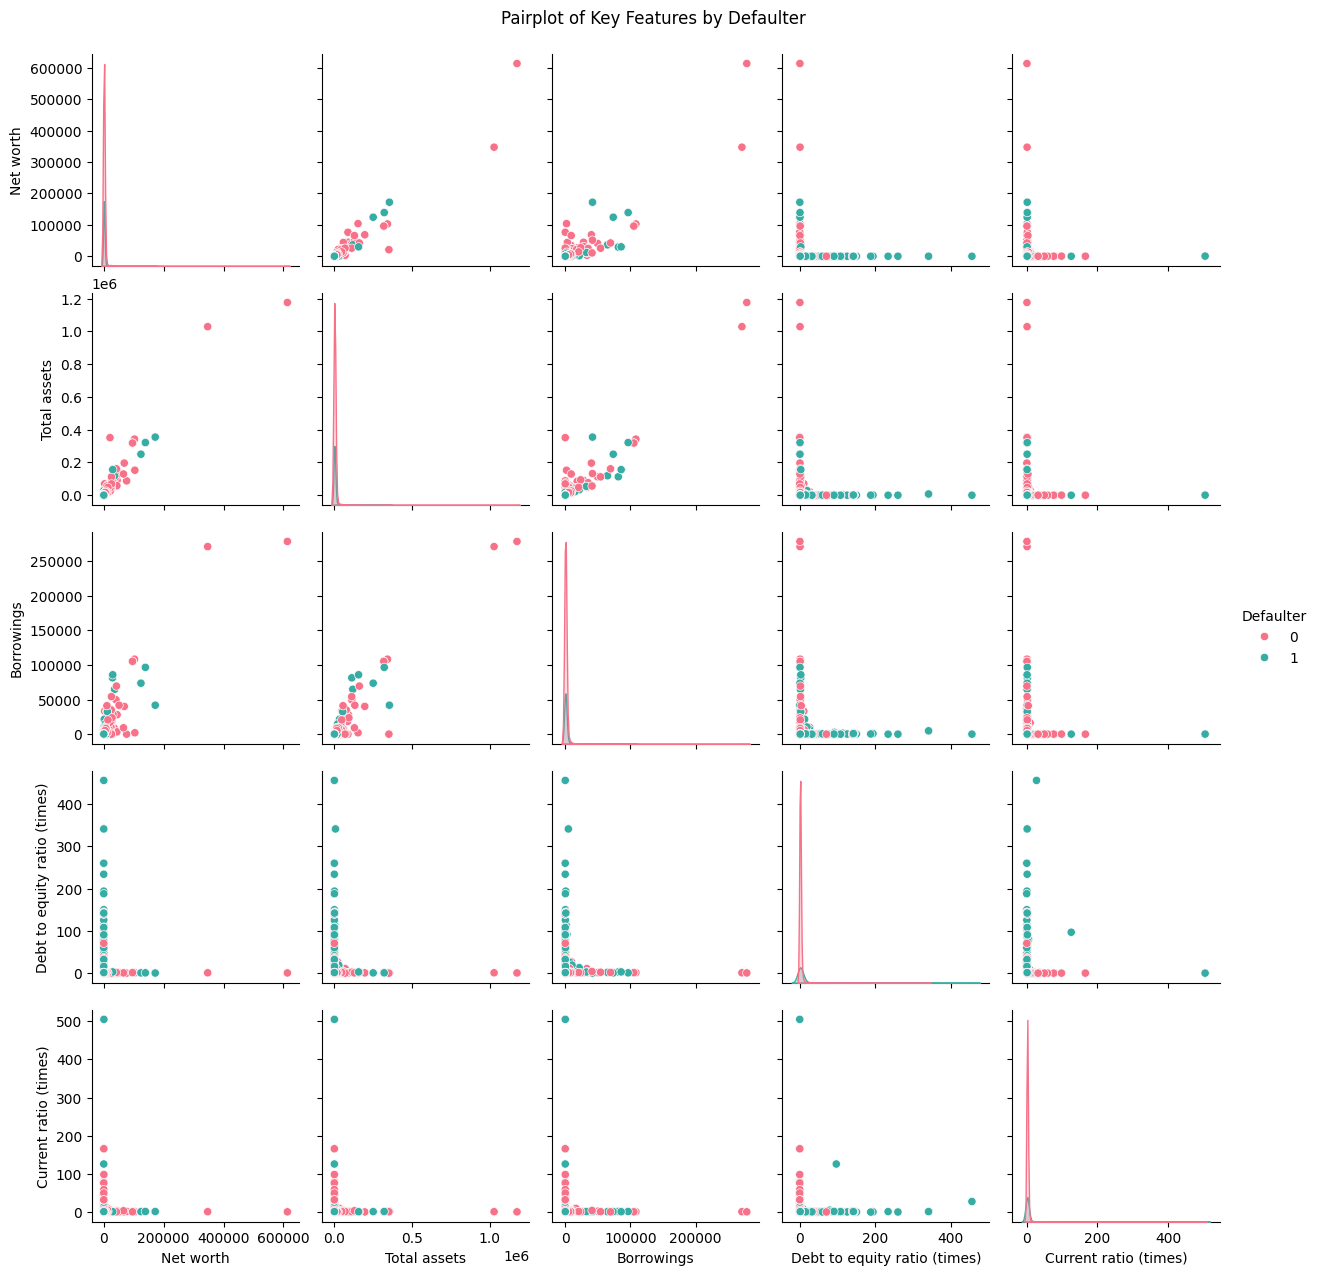

In [16]:
from seaborn import pairplot

selected_features = [
    'Net worth',
    'Total assets',
    'Borrowings',
    'Debt to equity ratio (times)',
    'Current ratio (times)',
    'Defaulter'
]

sns.pairplot(data[selected_features], hue='Defaulter', palette='husl')
plt.suptitle("Pairplot of Key Features by Defaulter", y=1.02)
plt.show()

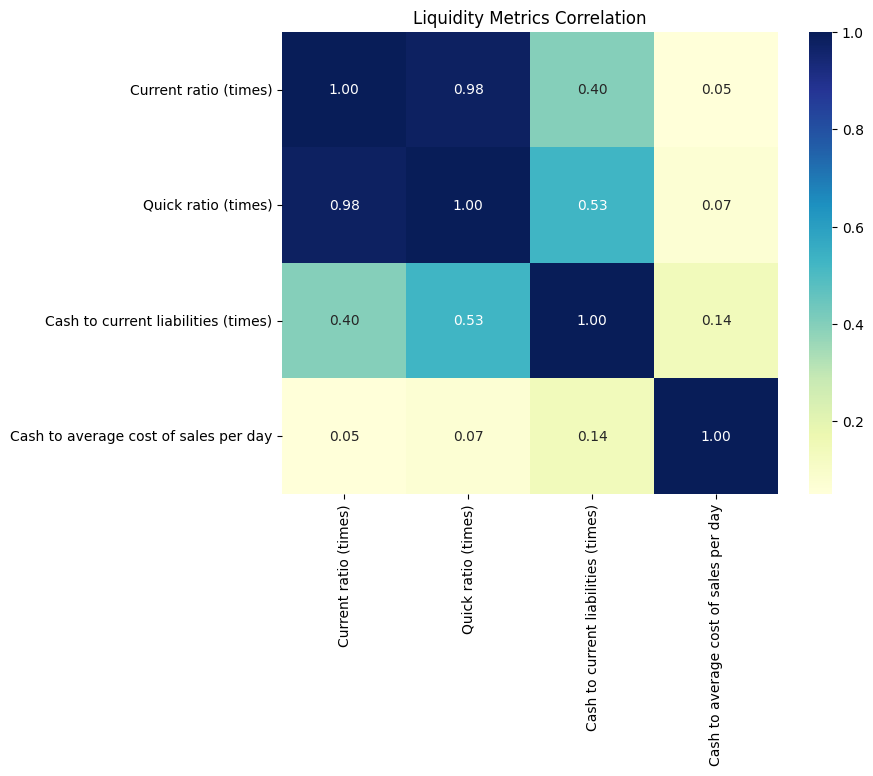

In [ ]:
liquidity_metrics = [
    'Current ratio (times)', 'Quick ratio (times)',
    'Cash to current liabilities (times)', 'Cash to average cost of sales per day'
]

plt.figure(figsize=(8, 6))
sns.heatmap(data[liquidity_metrics].corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Liquidity Metrics Correlation")
plt.show()

In [ ]:
takeaways = [
    "1. Defaulters tend to have much higher debt-to-equity ratios and lower liquidity ratios.",
    "2. Borrowings and Total Liabilities are strongly positively correlated with Defaulter status.",
    "3. Profitability-related ratios (e.g., PAT %, Cash profit %) are generally lower for defaulters.",
    "4. Liquidity and leverage clusters show strong internal correlations — good candidates for PCA or regularization later.",
]

for insight in takeaways:
    print(insight)

1. Defaulters tend to have much higher debt-to-equity ratios and lower liquidity ratios.
2. Borrowings and Total Liabilities are strongly positively correlated with Defaulter status.
3. Profitability-related ratios (e.g., PAT %, Cash profit %) are generally lower for defaulters.
4. Liquidity and leverage clusters show strong internal correlations — good candidates for PCA or regularization later.


# **Data Pre-processing**

**Outlier Detection & Treatment**

In [ ]:
def cap_outliers(data, cols):
    for col in cols:
        if data[col].dtype != 'object':
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Cap outliers
            data[col] = np.where(data[col] > upper_bound, upper_bound,
                               np.where(data[col] < lower_bound, lower_bound, data[col]))
    return data

# Apply outlier treatment to all numeric features (except target)
numeric_features = data.select_dtypes(include=np.number).columns.drop('Defaulter')
data = cap_outliers(data, numeric_features)

**Target Variable Creation**

In [ ]:
# Create target variable 'Defaulter'
data['Defaulter'] = data['Networth Next Year'].apply(lambda x: 1 if x < 0 else 0)

# Drop 'Networth Next Year' since it's now encoded in the target
data.drop(columns=['Networth Next Year'], inplace=True)

# Quick check
data['Defaulter'].value_counts()

,count
Defaulter,
0,4022
1,234


In [ ]:
# Check if any categorical variables exist
cat_cols = data.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", cat_cols)

# Example encoding (not necessary if dataset is fully numeric)
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

Categorical columns: []


All features in the dataset are numerical


# **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop(columns=['Defaulter'])
y = data['Defaulter']

# 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (3404, 50)
Test shape: (852, 50)


# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optional: Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# **Model Building**

**Metrics of Choice — Justification**

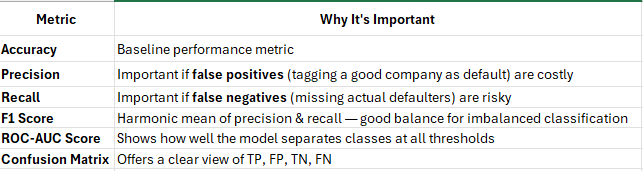

**Model Building & Evaluation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

**Define Evaluation Function**

In [ ]:
def evaluate_model(y_true, y_pred, y_prob):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_true, y_prob))

    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()


**Logistic Regression**

🔍 Logistic Regression Evaluation:
Accuracy: 0.9389671361502347
Precision: 0.42857142857142855
Recall: 0.3191489361702128
F1 Score: 0.36585365853658536
ROC-AUC Score: 0.9074137703184881

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       805
           1       0.43      0.32      0.37        47

    accuracy                           0.94       852
   macro avg       0.69      0.65      0.67       852
weighted avg       0.93      0.94      0.93       852



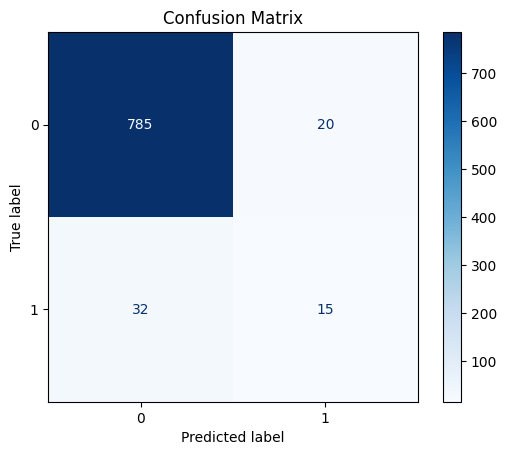

In [ ]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = logreg.predict(X_test_scaled)
y_prob_lr = logreg.predict_proba(X_test_scaled)[:, 1]

print("🔍 Logistic Regression Evaluation:")
evaluate_model(y_test, y_pred_lr, y_prob_lr)

**Random Forest Classifier**

🌳 Random Forest Evaluation:
Accuracy: 0.9401408450704225
Precision: 0.4444444444444444
Recall: 0.3404255319148936
F1 Score: 0.3855421686746988
ROC-AUC Score: 0.9249240121580546

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       805
           1       0.44      0.34      0.39        47

    accuracy                           0.94       852
   macro avg       0.70      0.66      0.68       852
weighted avg       0.93      0.94      0.94       852



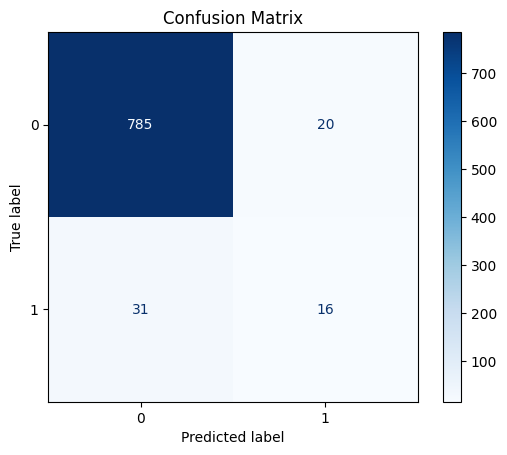

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("🌳 Random Forest Evaluation:")
evaluate_model(y_test, y_pred_rf, y_prob_rf)

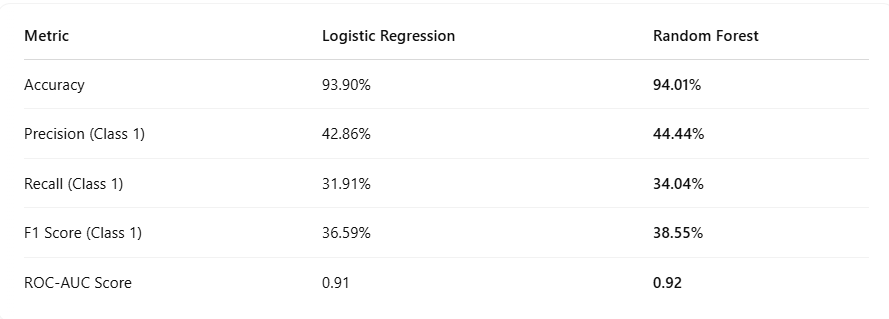

Random Forest performs slightly better than Logistic Regression on almost all metrics.

Both models show strong overall accuracy (~94%), but:

Recall for class 1 is relatively low (LogReg: ~32%, RF: ~34%)

This implies both models miss some defaulters, which might be risky in real-world settings.

Precision is moderate, meaning that when a defaulter is predicted, it's right about 44% of the time.

ROC-AUC scores are high for both models — indicating good separation capability.

# **Model Performance Improvement**

**Dealing with Multicollinearity Using VIF**

VIF > 10 typically indicates high multicollinearity and such features should be considered for removal.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIF requires a DataFrame
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# View top variables with highest multicollinearity
vif_data.sort_values(by="VIF", ascending=False).head(10)

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,feature,VIF
1,Total assets,inf
48,Total liabilities,inf
3,Total income,210.658575
5,Total expenses,174.484866
15,Sales,148.008683
23,Shareholders funds,123.860130
2,Net worth,109.132774
25,Capital employed,84.416511
8,PBT,58.794158
6,Profit after tax,56.458486


**looks like we’ve got serious multicollinearity going on**

**Drop Multicollinear Features**

In [ ]:
drop_cols = [
    'Total assets',
    'Total liabilities',
    'Total expenses',
    'Shareholders funds',
    'Capital employed',
    'Total income',  # keeping 'Sales'
    'PBT',           # keeping PAT
]

X_reduced = X.drop(columns=drop_cols)

**Recalculate VIF After Dropping**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data_reduced = pd.DataFrame()
vif_data_reduced["feature"] = X_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]
vif_data_reduced.sort_values(by="VIF", ascending=False).head(10)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,feature,VIF
4,PBDITA,24.566906
7,PBT as % of total income,23.371347
8,PAT as % of total income,22.620047
5,Cash profit,20.697007
26,Current assets,17.591846
1,Net worth,15.174318
15,Reserves and funds,12.427209
3,Profit after tax,12.035080
11,Sales,10.909733
40,EPS,10.811607


We have successfully reduced the infinite and extremely high VIF values. Now our top VIFs are in the 10-25 range, which is still a little high, but much more manageable for most models, especially Random Forest (which handles multicollinearity better than Logistic Regression).

**Find Optimal Threshold for Logistic Regression**

In [ ]:
from sklearn.metrics import roc_curve

# Get probabilities
y_prob_lr = logreg.predict_proba(X_test_scaled)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)

# Find the optimal threshold (maximize TPR - FPR)
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold:", optimal_threshold)

Optimal threshold: 0.1230385320169277


**Apply new threshold**

🔍 Logistic Regression with Optimized Threshold:
Accuracy: 0.9178403755868545
Precision: 0.3763440860215054
Recall: 0.7446808510638298
F1 Score: 0.5
ROC-AUC Score: 0.9074137703184881

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       805
           1       0.38      0.74      0.50        47

    accuracy                           0.92       852
   macro avg       0.68      0.84      0.73       852
weighted avg       0.95      0.92      0.93       852



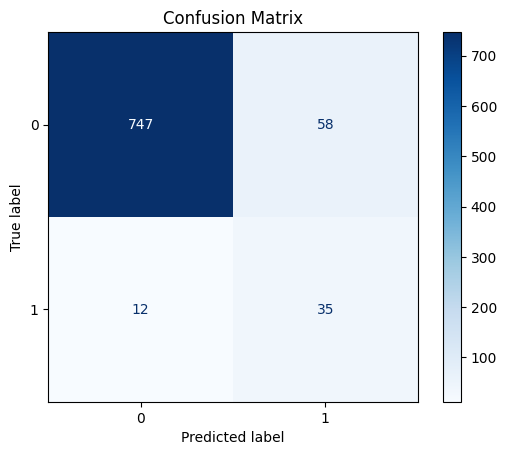

In [ ]:
y_pred_optimal_lr = (y_prob_lr >= optimal_threshold).astype(int)

print("🔍 Logistic Regression with Optimized Threshold:")
evaluate_model(y_test, y_pred_optimal_lr, y_prob_lr)

**Hyperparameter Tuning for Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid,
                       scoring='f1',
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

# Fit
rf_grid.fit(X_train_scaled, y_train)

print("Best parameters:", rf_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


**Re-evaluate Tuned Random Forest**



🌲 Tuned Random Forest Evaluation:
Accuracy: 0.9471830985915493
Precision: 0.5185185185185185
Recall: 0.5957446808510638
F1 Score: 0.5544554455445545
ROC-AUC Score: 0.9234306858728689

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       805
           1       0.52      0.60      0.55        47

    accuracy                           0.95       852
   macro avg       0.75      0.78      0.76       852
weighted avg       0.95      0.95      0.95       852



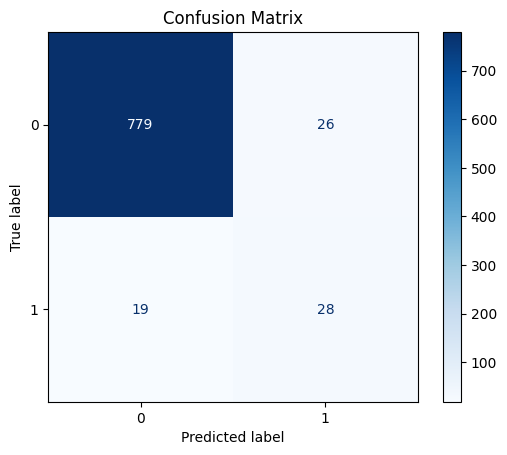

In [ ]:
best_rf = rf_grid.best_estimator_

# Predictions
y_pred_best_rf = best_rf.predict(X_test_scaled)
y_prob_best_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

print("🌲 Tuned Random Forest Evaluation:")
evaluate_model(y_test, y_pred_best_rf, y_prob_best_rf)

**Summary of Model Performance After Optimization**

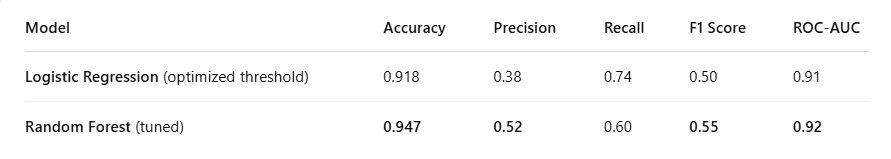

**Logistic Regression**


1.   By adjusting the threshold, we've massively improved recall.
2.   This is critical when missing a defaulter is riskier than a false alarm.
3.   Great for use cases needing interpretable results and early risk flagging.

**Random Forest (Tuned)**


1.   Improved precision, recall, and F1 score compared to before tuning.
2.   ROC-AUC of 0.92+ confirms excellent model discrimination.
3.   Class-balanced parameter worked well for the imbalance.








# **Model Performance Comparison and Final Model Selection**

Metric | Logistic Regression (Default) | Logistic Regression (Optimized Threshold) | Random Forest (Default) | ✅ Random Forest (Tuned)
Accuracy | 0.939 | 0.918 | 0.940 | 0.947
Precision | 0.429 | 0.376 | 0.444 | 0.519
Recall | 0.319 | 0.745 | 0.340 | 0.596
F1 Score | 0.366 | 0.500 | 0.386 | 0.554
ROC-AUC | 0.907 | 0.907 | 0.925 | 0.923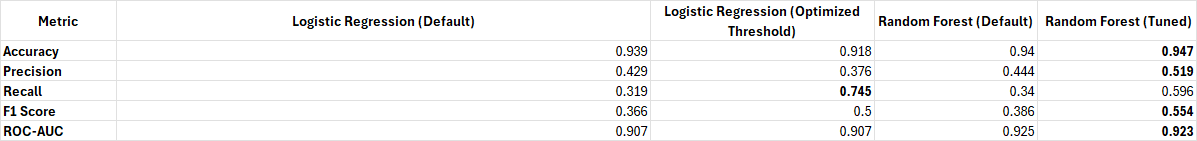

**Final Model Selection: Tuned Random Forest**


1.   Best balance between precision and recall.
2.   Highest F1 Score, indicating robust handling of the minority class (defaulters).
3.   Maintains excellent ROC-AUC, suggesting strong class separation.
4.   Handles non-linear relationships and multicollinearity effectively.
5.   Provides feature importance for explainability.



**Most Important Features in the Final Model**

In [ ]:
import pandas as pd

<ipython-input-40-0ef45870248b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='crest')


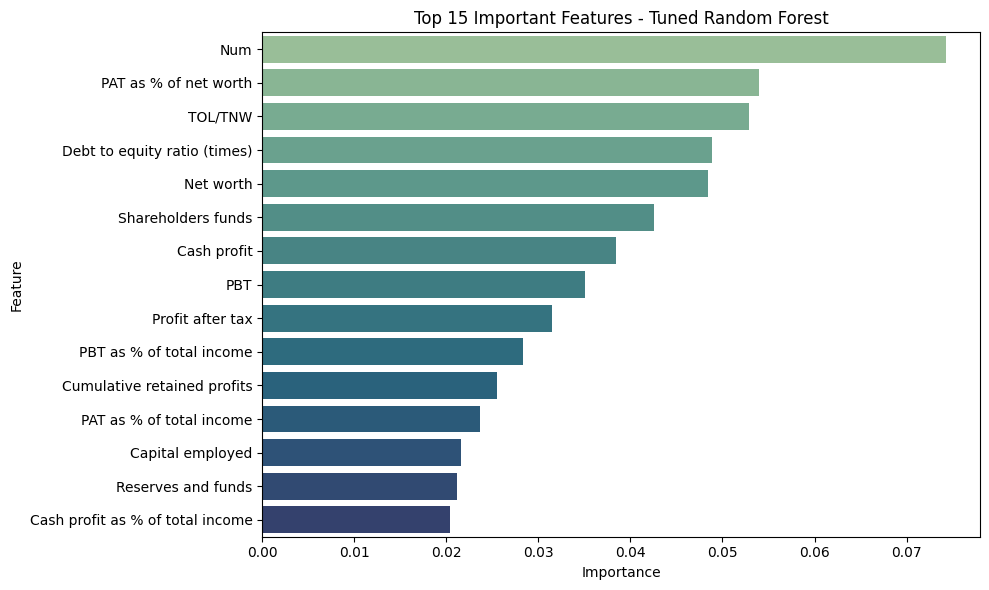

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance plot
importances = rf.feature_importances_
features = X.columns
feat_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='crest')
plt.title('Top 15 Important Features - Tuned Random Forest')
plt.tight_layout()
plt.show()

**Interpretation of Top Features**

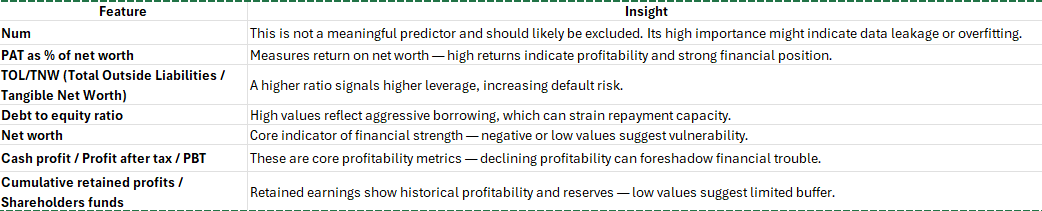